<a href="https://colab.research.google.com/github/RFdream/ML100-Days/blob/master/Data/Day082_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
from keras.layers import Input, Dropout, Dense

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [0]:
## 超參數設定
"""
Set Hyper-parameters here
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1, 0.25, 0.5]

In [17]:
from keras.optimizers import Adam

results = {}
"""
Write your training loop and record results
"""
for drp_ratio in Dropout_EXP:
    name = 'dropout-' + str(drp_ratio)
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp_ratio)
    print(drp_ratio)
    
    optimizer = Adam(lr=LEARNING_RATE)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    results[name] = model.fit(
        x_train,
        y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_data=(x_test, y_test),
        shuffle=True,
        verbose=1
    )

0.1
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 270us/step - loss: 1.9857 - acc: 0.2734 - val_loss: 1.7881 - val_acc: 0.3528
Epoch 2/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.7753 - acc: 0.3590 - val_loss: 1.7238 - val_acc: 0.3786
Epoch 3/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.7093 - acc: 0.3878 - val_loss: 1.6628 - val_acc: 0.3981
Epoch 4/50
50000/50000 [==============================] - 14s 270us/step - loss: 1.6510 - acc: 0.4087 - val_loss: 1.5696 - val_acc: 0.4396
Epoch 5/50
50000/50000 [==============================] - 14s 272us/step - loss: 1.6121 - acc: 0.4248 - val_loss: 1.5880 - val_acc: 0.4332
Epoch 6/50
50000/50000 [==============================] - 14s 271us/step - loss: 1.5741 - acc: 0.4371 - val_loss: 1.5437 - val_acc: 0.4522
Epoch 7/50
50000/50000 [==============================] - 14s 27

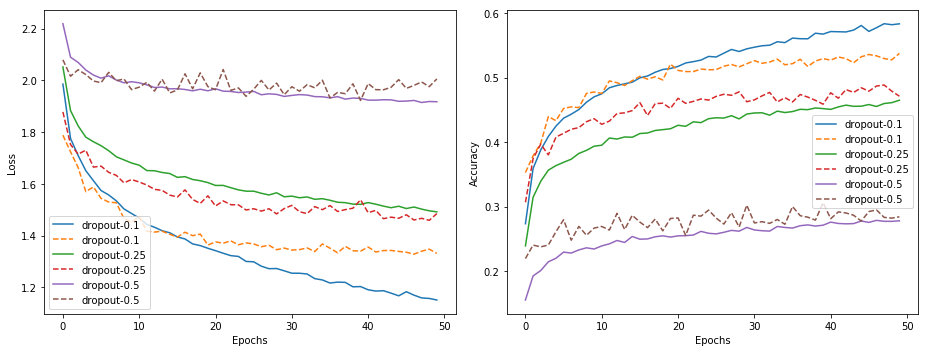

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(13, 5))
for name, history in results.items():
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    ax[0].plot(loss, linestyle='-', label=name)
    ax[0].plot(val_loss, linestyle='--', label=name)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    ax[1].plot(acc, linestyle='-', label=name)
    ax[1].plot(val_acc, linestyle='--', label=name)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

plt.tight_layout()
plt.show()